In [45]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [50]:
data_dir

'/root/.keras/datasets/flower_photos'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))

3670

In [7]:
roses = list(data_dir.glob('roses/*'))

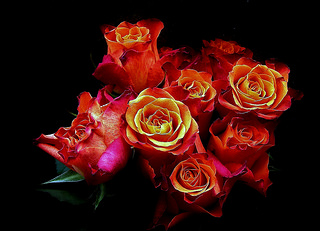

In [9]:
PIL.Image.open(str(roses[2]))

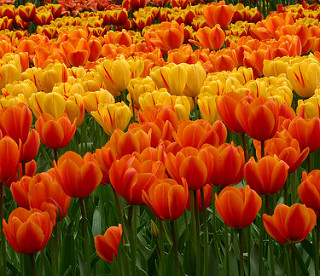

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [12]:
flower_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

array([[[14, 25,  5],
        [22, 34, 12],
        [30, 45, 18],
        ...,
        [39, 53, 19],
        [45, 53, 16],
        [48, 50, 14]],

       [[27, 41, 13],
        [31, 45, 17],
        [36, 53, 20],
        ...,
        [39, 50, 18],
        [45, 50, 18],
        [48, 49, 15]],

       [[47, 66, 27],
        [50, 70, 28],
        [52, 72, 29],
        ...,
        [44, 50, 19],
        [47, 52, 21],
        [51, 52, 20]],

       ...,

       [[ 7, 31, 13],
        [ 3, 25,  7],
        [ 0, 18,  3],
        ...,
        [46, 69, 55],
        [41, 62, 54],
        [38, 60, 55]],

       [[16, 53, 27],
        [12, 44, 20],
        [ 5, 32, 12],
        ...,
        [45, 68, 54],
        [40, 63, 55],
        [39, 61, 56]],

       [[25, 69, 38],
        [18, 58, 30],
        [12, 44, 20],
        ...,
        [44, 67, 53],
        [40, 64, 54],
        [40, 62, 57]]], dtype=uint8)
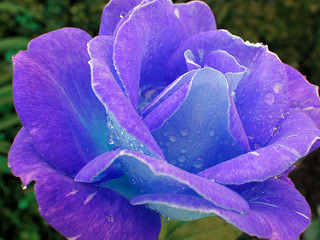

In [14]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img

array([[[19, 31,  9],
        [32, 48, 19],
        [43, 65, 27],
        ...,
        [42, 55, 23],
        [39, 53, 19],
        [47, 51, 15]],

       [[38, 55, 21],
        [44, 63, 25],
        [51, 74, 29],
        ...,
        [41, 49, 18],
        [41, 50, 18],
        [48, 51, 18]],

       [[60, 84, 34],
        [64, 89, 37],
        [67, 93, 39],
        ...,
        [54, 54, 20],
        [48, 54, 20],
        [52, 54, 22]],

       ...,

       [[ 2, 17,  4],
        [ 0, 12,  0],
        [ 0,  7,  0],
        ...,
        [62, 87, 62],
        [49, 72, 57],
        [38, 61, 53]],

       [[10, 39, 17],
        [ 2, 24,  7],
        [ 2, 11,  2],
        ...,
        [59, 84, 60],
        [46, 70, 55],
        [39, 61, 55]],

       [[21, 62, 33],
        [10, 40, 18],
        [ 6, 20,  9],
        ...,
        [55, 81, 57],
        [45, 68, 54],
        [40, 63, 56]]], dtype=uint8)
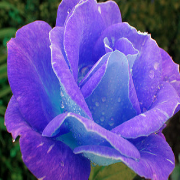

In [15]:
cv2.resize(img, (180, 180))

In [26]:
X,y  = [],[]
for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [27]:
len(X)

3670

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [32]:
X_train, X_test  = X_train /255, X_test /255

In [33]:
y_train , y_test = np.array(y_train), np.array(y_test)

In [38]:
X_train.shape

(2752, 180, 180, 3)

In [35]:
model = Sequential ([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.3508 - loss: 1.4559
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5780 - loss: 1.0337
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6588 - loss: 0.8748
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7287 - loss: 0.6783
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8592 - loss: 0.4202
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9197 - loss: 0.2345
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9606 - loss: 0.1370
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9703 - loss: 0.0896
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9769 - loss: 0.0721
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9960 - loss: 0.0214


In [39]:
model.evaluate(X_test, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6616 - loss: 1.6768


[1.6427937746047974, 0.6623093485832214]

In [40]:
prediction = model.predict(X_test)
prediction

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


array([[5.7454710e-03, 9.9090672e-01, 3.1324173e-03, 7.8042804e-06,
        2.0755848e-04],
       [8.3868474e-01, 1.8845813e-02, 4.6505064e-02, 4.6621525e-04,
        9.5498145e-02],
       [6.8992178e-04, 1.6017081e-01, 8.0682534e-01, 3.2041576e-02,
        2.7240196e-04],
       ...,
       [4.9207411e-08, 1.5460720e-12, 4.7690939e-04, 9.9952257e-01,
        4.5520943e-07],
       [3.1464245e-02, 4.8503134e-01, 4.6725106e-01, 4.8178485e-05,
        1.6205117e-02],
       [8.2639390e-06, 3.7791018e-05, 1.1440853e-04, 9.9982381e-01,
        1.5714073e-05]], dtype=float32)

In [42]:
score = tf.nn.softmax(prediction[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.15005125, 0.40187383, 0.14965968, 0.14919278, 0.14922258],
      dtype=float32)>

In [77]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180,180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


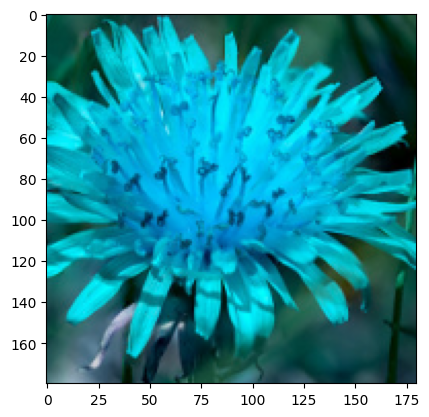

In [78]:
plt.imshow(X_train[0])

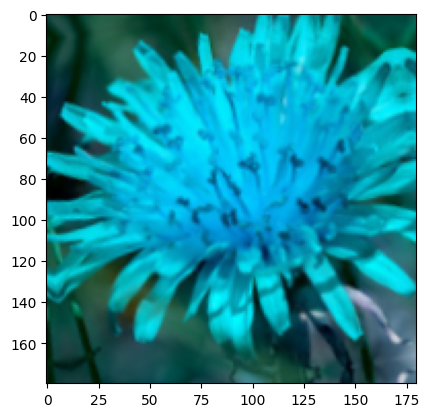

In [79]:
plt.imshow(data_augmentation(X_train)[0])

In [80]:
model = Sequential ([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout( 0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(5, activation = 'softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [81]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.3440 - loss: 1.5295
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5423 - loss: 1.1201
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5573 - loss: 1.0643
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5946 - loss: 0.9855
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6542 - loss: 0.8548
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6891 - loss: 0.8218
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6830 - loss: 0.7902
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7096 - loss: 0.7490
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7220 - loss: 0.7016
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7247 - loss: 0.7071
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7395 - loss: 0.6681
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy:

In [82]:
model.evaluate(X_test, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7464 - loss: 0.8384


[0.8291341662406921, 0.7342047691345215]